Steps to Creating this Project:
First stages:
 1. Registered at CoinMarketCap and read their API documentation to get my API key.
 2. Set Up Development Environment, hence imported required libraries
 3. Fetched Data from API
 4. Handled API Rate Limits

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'1000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '802c100a-8ccc-4ddd-8bb9-514a7881943e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

 5. Parsed the Json Data for analysis

In [8]:
import pandas as pd

In [9]:
pd.set_option('display.max_columns', None)

In [92]:
df = pd.json_normalize(data['data'])


6.Feature Engineering

 7. Automatically stored data into a csv file for further analysis through executing some line code
 8. Built an automatic runner that runs after every 1min to update data

In [93]:
df['time_stamp']=pd.to_datetime('now')


In [28]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
       'start':'1',
       'limit':'333',
       'convert':'USD'
  }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '802c100a-8ccc-4ddd-8bb9-514a7881943e',
  }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)




#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
#df2 = pd.json_normalize(data['data'])
#df2['timestamp']=pd.to_datetime('now')
#try:
   # df
#except NameError:
    #df = pd.DataFrame()

# Use pd.concat to append df2 to df
#df = pd.concat([df, df2], ignore_index=True)

    df2= pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df=df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r"C:\Users\PC\OneDrive\Dokumente\Python Scripts\API1.csv"):
        df.to_csv(r"C:\Users\PC\OneDrive\Dokumente\Python Scripts\API1.csv", header = 'column_names')
    else:
         df.to_csv(r"C:\Users\PC\OneDrive\Dokumente\Python Scripts\API1.csv", mode='a',header=False)
      

In [29]:
import os
from time import time
from time import sleep
for i in range (333):
    api_runner()
    print('API Runner Completed successfully')
    sleep(60)
exit() #sleeps for a minute

API Runner Completed successfully
API Runner Completed successfully


KeyboardInterrupt: 

9.Data Transformation

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.groupby('name', sort=False)

In [89]:
df3= df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()


In [52]:
df3.count()

quote.USD.percent_change_1h     998
quote.USD.percent_change_24h    998
quote.USD.percent_change_7d     998
quote.USD.percent_change_30d    998
quote.USD.percent_change_60d    998
quote.USD.percent_change_90d    998
dtype: int64

In [90]:
df4 = df3.stack()

In [91]:
pd.set_option('display.max_rows',None)
df5= df4.to_frame(name = 'values')

In [88]:
index = pd.Index(range(5988))
df6 = df5.reset_index()


In [86]:
df7 = df6.rename(columns={'level_1':'percentage_change'})


In [87]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8= df7.head(25)


Data Visualization using Seaborn and plotly libraries
created an interactive visualization using plotly.express

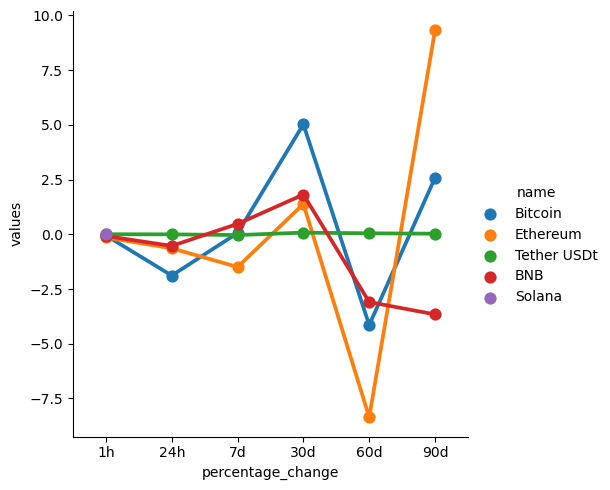

In [84]:
import seaborn as sns
sns.catplot(x='percentage_change',y='values', hue='name', data=df8,kind ='point')

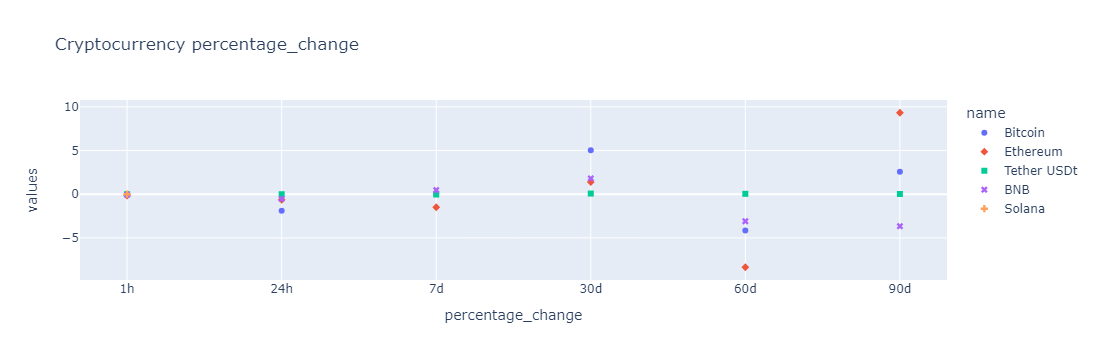

In [96]:
import plotly.express as px
fig = px.scatter(df8, 
                 x='percentage_change', 
                 y='values', 
                 color='name', 
                 symbol='name', 
                 title='Cryptocurrency percentage_change')
fig.show()

There was fluctuation in the percentage_change of various cryptos
showcasing Volatility Measurement:

1.High Percentage Change: Large percentage changes (both positive and negative) indicate high volatility. This is common in cryptocurrencies due to their speculative nature and market sentiment.
2.Low Percentage Change: Small percentage changes suggest lower volatility and a more stable market. This might occur during consolidation periods or when the market is less active.

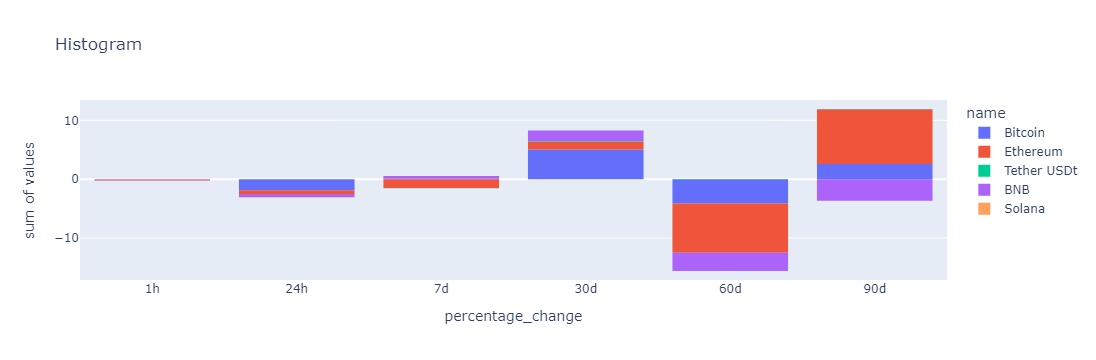

In [103]:
fig = px.histogram(df8, 
                   x='percentage_change',
                   y='values',
                   color='name',
                   title='Histogram')

# Show the histogram
fig.show()